# Лабораторная работа №2. Дискретные LTI системы.

Лаборатория цифровой обработки сигналов, ФРКТ МФТИ


Дискретные LTI системы (англ. Linear time-invariant system) — линейные стационарные дискретные системы.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal
import time

# Модуль 1. Линейная дискретная свертка.

## Задача 1.1. Линейная дискретная свертка прямоугольных окон 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|    $M$    | 4 | 5 | 6 | 4 | 5 | 6 |

Вычислить аналитически линейную дискретную свертку двух одинаковых последовательностей $x[k]$ и $h[k]$, таких, что 
$$x[k]=h[k]=\sum_{m=0}^{M-1}\mathbf{1} [k-m], $$ 
где $M$ соответствует варианту, непосредственно воспользовавшись формулой линейной дискретной свертки
$$y[k]=\sum_{m=-\infty}^{\infty} x[m] h[k-m].$$

Проверить результаты с помощью моделирования, воспользовавшись функцией `signal.convolve`

Text(0, 0.5, 'y[k]')

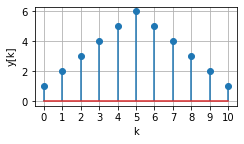

In [ ]:
M = 6

x_array = np.ones (M)
y_array = signal.convolve (x_array, x_array, method = 'fft')

plt.figure(figsize=[8, 4])
plt.subplot(2, 2, 1)
plt.stem(y_array, use_line_collection=True)
plt.grid()
plt.xticks(np.arange(x_array.size + x_array.size - 1))
plt.xlabel("k")
plt.ylabel("y[k]")

In [ ]:
def rectangular_convolve_anal (k, N):
  if k >= 0 and k < N:
    return k + 1
  elif k >= N and k <= 2 * N - 1:
    return 2 * (N - 1) - k
  else:
    return 0

Text(0, 0.5, 'y[k], analytics')

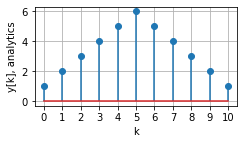

In [ ]:
y = [rectangular_convolve_anal (k, M) for k in range (2 * M - 1)]
plt.figure(figsize=[8, 4])
plt.subplot(2, 2, 1)
plt.stem(y_array, use_line_collection=True)
plt.grid()
plt.xticks(np.arange (y_array.size))
plt.xlabel("k")
plt.ylabel("y[k], analytics")

## Задача 1.2. Эффективное вычисление свертки 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ |
|$n_0$| 128 | 32 | 256 | 64 | 512 | 1024 |

Даны последовательности отсчетов
$$ x[k]= \cos(2\pi kn_0/N)$$  
$$ h[k]= \sin(2\pi kn_0/N)$$  
где $n_0$, $N$ взять из таблицы сверху в соответствии с вариантом и $k$ пробегает значения от $0$ до $N-1.$  
Вычислить их линейную дискретную свертку c помощью `signal.convolve()` двумя способами: с помощью прямого вычисления по формуле свёртки и с использованием алгоритма БПФ.  
Сравнить вычислительную эффективность, сделать вывод. 

P.S. На вычисление свертки по формуле может потребоваться значительное колличество времени. 



In [ ]:
def convolve (x, y):
  convolve_len = len (x) + len (y) - 1
  result = [0] * convolve_len 
  for k in range (convolve_len):
    for i in range (k + 1):
      result[k] += x[i] * y[k - i] 
  return result

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal
import time

N = 2**17
n0 = 256
x = [np.cos (2 * np.pi * k * n0 / N) for k in range (N)]
y = [np.sin (2 * np.pi * k * n0 / N) for k in range (N)]


start_time = time.time ()
result_direct = signal.convolve (x, y, method="direct")
print("{} seconds".format (time.time () - start_time))




6.827933073043823 seconds


In [ ]:
start_time = time.time ()
result_fft = signal.convolve (x, y, method="fft")
print("{} seconds".format (time.time () - start_time))

0.055490732192993164 seconds


# Модуль 2. Характеристики LTI систем.






## Задача 2.1. Фильтр скользящего среднего

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|$M_1$|  9 | 14 | 13 |  9 | 12 |  11 |
|$M_2$| 29 | 50 | 40 | 24 | 50 |  45 |
| $K$ | 35 | 63 | 57 | 35 | 63 |  55 |
| $N$ |100 |140 |130 |100 |140 | 115 |

Рассмотрите фильтр скользящего среднего

$$y[k]=\dfrac{1}{M}\sum_{m=0}^{M-1} x[k-m]$$

для $M = M_1$ и $M = M_2$ (из таблицы): 

* Определите и изобразите импульсную характеристику $h[k]$ фильтра.

* Вычислите с помощью `signal.convolve` отклик $y[k]$ фильтра на входное воздействие вида
$$ x_{noise}[k] = \sin(2\pi k / K) + \varepsilon[k], 0\le k\le N-1.$$
где $K,\;N$ — соответствующие числа из таблицы, $\varepsilon[k]$ — белый гаусовский шум (`np.random.normal(mu, sigma, N)`) с нулевым среднем `mu=0` и  среднеквадратическим отклонением $\sigma=0.1$ (`sigma=0.1`).  
* Сравните сигналы $x_{noise}[k]$, $y[k]$ и 
$$ x[k] = \sin(2\pi k / K), 0\le k\le N-1.$$
* Определите и изобразите амплитудно-частотную характеристику (АЧХ) $|H(\nu)|$ фильтра. Как выбор $M$ влияет на результат фильтрации отрезка гармонического сигнала?

Text(0, 0.5, 'h1[k]')

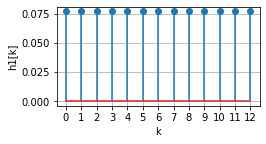

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
M1 = 13
M2 = 40
K = 57
N = 130

h1 = np.array ([1 / M1] * M1)
plt.figure (figsize=[8, 4])
plt.subplot (2, 2, 1)
plt.stem (h1, use_line_collection=True)
plt.grid ()
plt.xticks(np.arange (h1.size))
plt.xlabel ("k")
plt.ylabel ("h1[k]")


In [ ]:
x = np.array ([np.sin (2 * np.pi * k / K) for k in range (N)])
noise = np.random.normal (0, 0.1, N)
x_noise = x + noise
y = np.convolve (x_noise, h1)

Text(0, 0.5, 'x[k]')

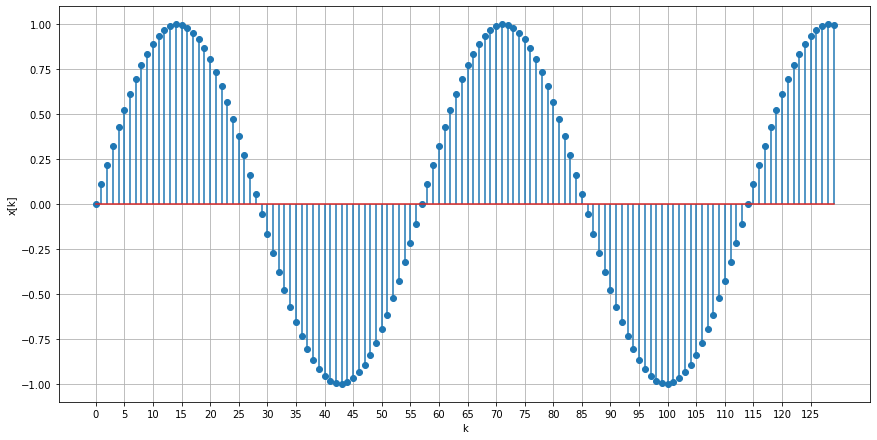

In [ ]:
plt.figure (figsize=[32, 16])
plt.subplot (2, 2, 1)
plt.stem (x, use_line_collection=True)
plt.grid ()
plt.xticks(np.arange (0, x.size, 5))
plt.xlabel ("k")
plt.ylabel ("x[k]")


Text(0, 0.5, '$x_{noise}[k]$')

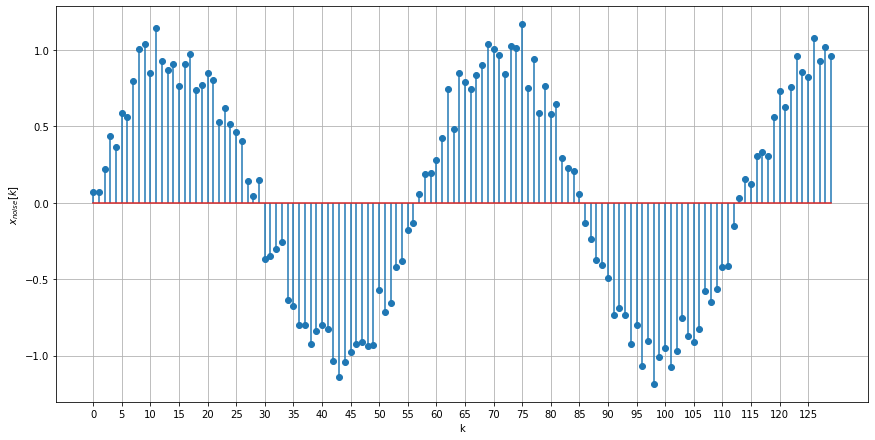

In [ ]:
plt.figure (figsize=[32, 16])
plt.subplot (2, 2, 1)
plt.stem (x_noise, use_line_collection=True)
plt.grid ()
plt.xticks(np.arange (0, x.size, 5))
plt.xlabel ("k")
plt.ylabel ("$x_{noise}[k]$")

Text(0, 0.5, '$y[k]$')

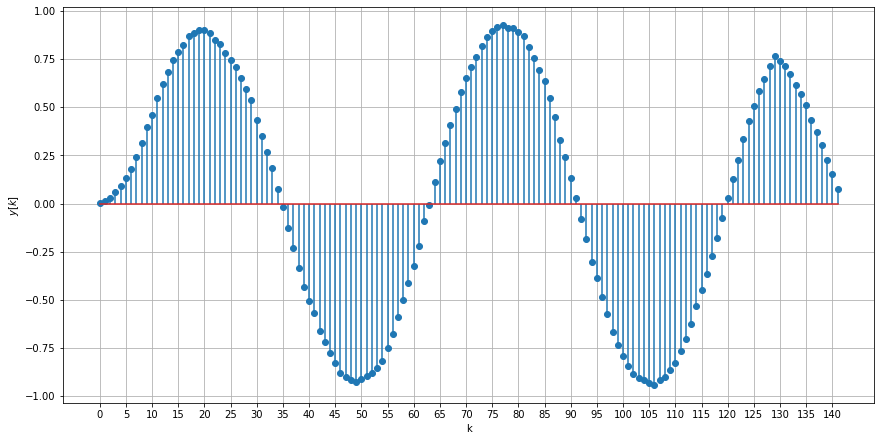

In [ ]:
plt.figure (figsize=[32, 16])
plt.subplot (2, 2, 1)
plt.stem (y, use_line_collection=True)
plt.grid ()
plt.xticks(np.arange (0, y.size, 5))
plt.xlabel ("k")
plt.ylabel ("$y[k]$")

In [ ]:
def dtft(x, M=1024):
  return -0.5 + np.arange(M)/M, np.fft.fftshift(np.fft.fft(x, M))

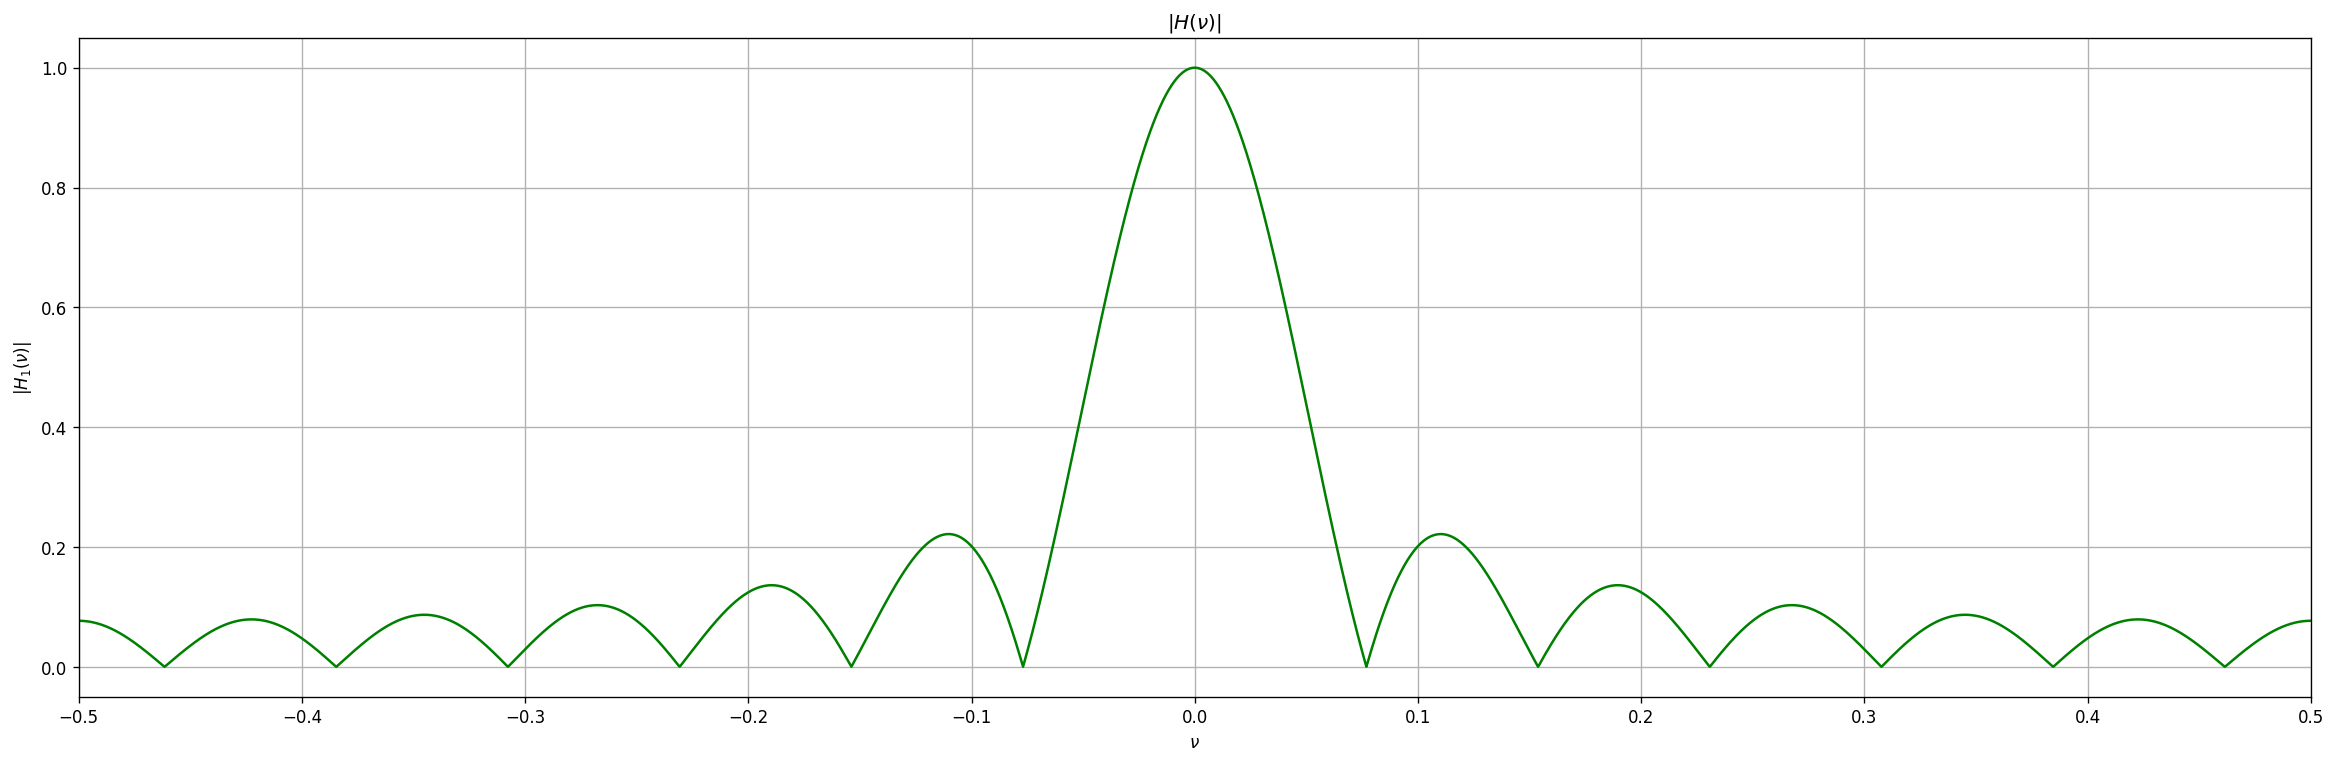

In [ ]:


nu, H1 = dtft (h1, 4096)
plt.figure(figsize=[24, 16], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(H1), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|H_1(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("$|H(\\nu)|$")
plt.grid()

Text(0, 0.5, 'h2[k]')

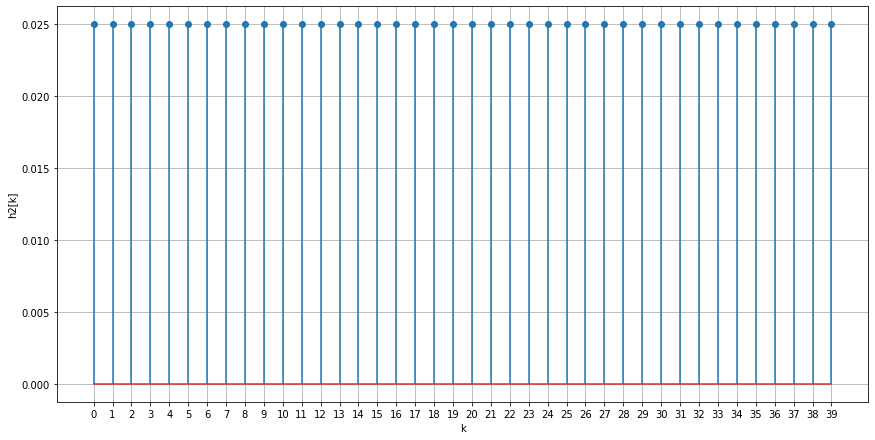

In [ ]:
h2 = np.array ([1 / M2] * M2)
plt.figure (figsize=[32, 16])
plt.subplot (2, 2, 1)
plt.stem (h2, use_line_collection=True)
plt.grid ()
plt.xticks(np.arange (h2.size))
plt.xlabel ("k")
plt.ylabel ("h2[k]")

In [ ]:
x = np.array ([np.sin (2 * np.pi * k / K) for k in range (N)])
noise = np.random.normal (0, 0.1, N)
x_noise = x + noise
y = np.convolve (x_noise, h2)

Text(0, 0.5, 'x[k]')

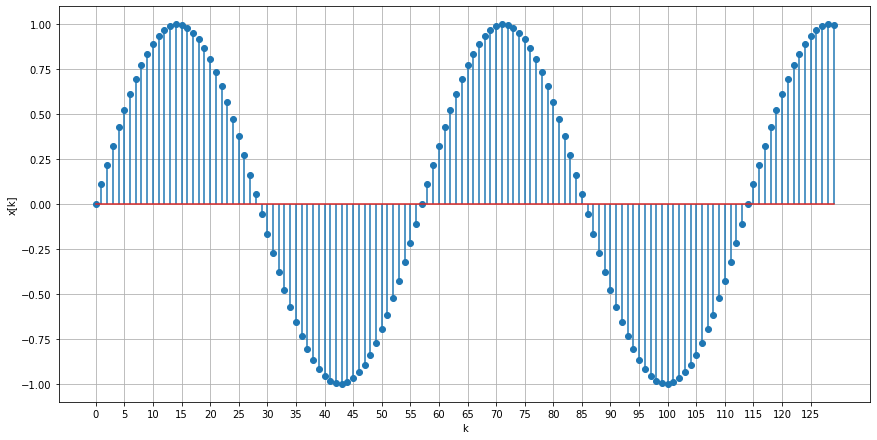

In [ ]:
plt.figure (figsize=[32, 16])
plt.subplot (2, 2, 1)
plt.stem (x, use_line_collection=True)
plt.grid ()
plt.xticks(np.arange (0, x.size, 5))
plt.xlabel ("k")
plt.ylabel ("x[k]")


Text(0, 0.5, '$x_{noise}[k]$')

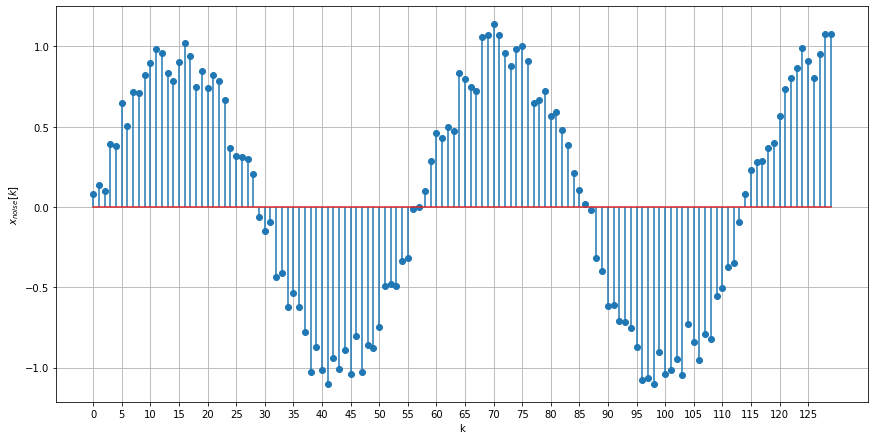

In [ ]:
plt.figure (figsize=[32, 16])
plt.subplot (2, 2, 1)
plt.stem (x_noise, use_line_collection=True)
plt.grid ()
plt.xticks(np.arange (0, x.size, 5))
plt.xlabel ("k")
plt.ylabel ("$x_{noise}[k]$")

Text(0, 0.5, '$y[k]$')

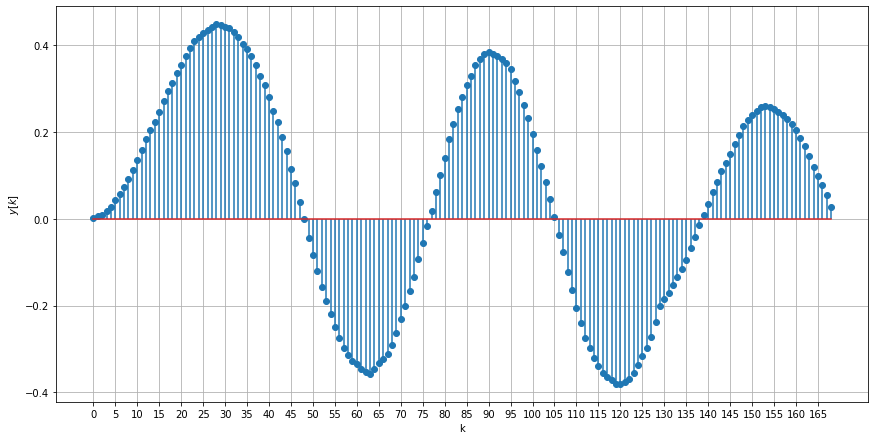

In [ ]:
plt.figure (figsize=[32, 16])
plt.subplot (2, 2, 1)
plt.stem (y, use_line_collection=True)
plt.grid ()
plt.xticks(np.arange (0, y.size, 5))
plt.xlabel ("k")
plt.ylabel ("$y[k]$")

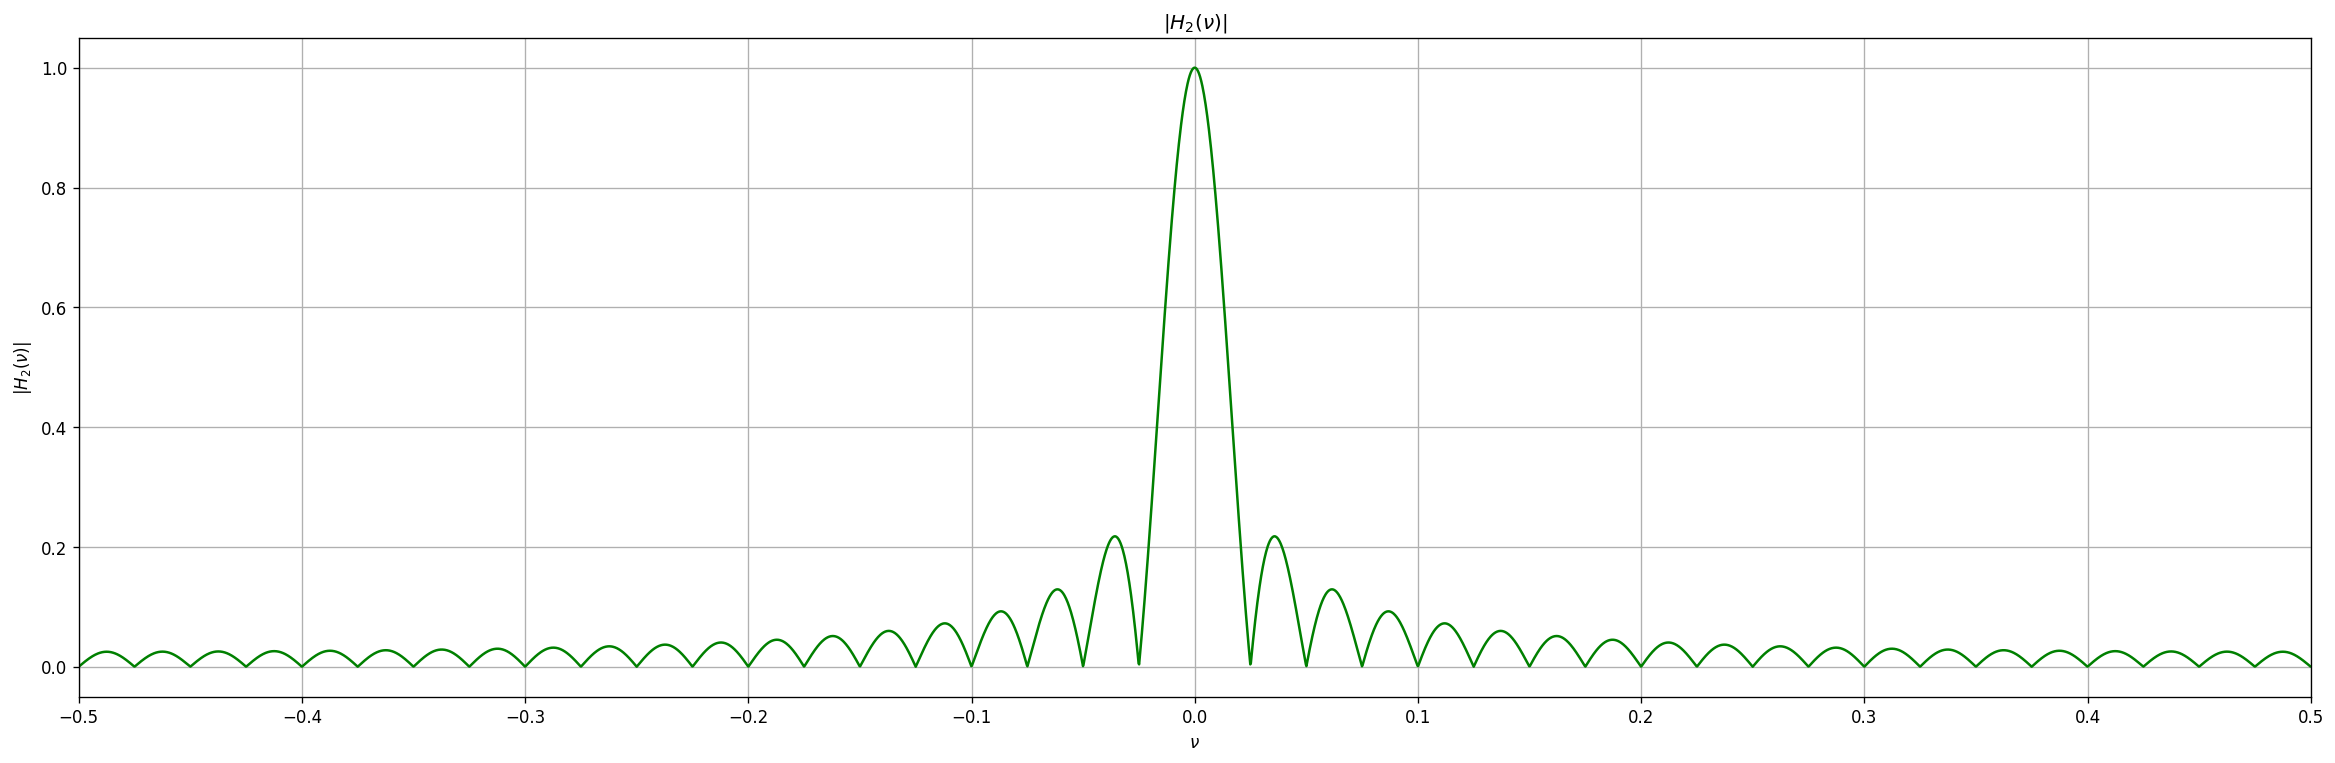

In [ ]:


nu, H2 = dtft (h2, 4096)
plt.figure(figsize=[24, 16], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(H2), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|H_2(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("$|H_2(\\nu)|$")
plt.grid()

## Задача 2.2. Двухкаскадный фильтр

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
| $a$ |  1 |  1 |  1 |  1 |  1 |  1 |
| $b$ |0.8 |0.7 |0.6 |0.8 |0.7 |0.6 |
| $c$ |0.5 |0.4 |0.3 |0.5 |0.3 |0.4 |
| $M$ | 50 | 60 | 50 | 50 | 50 | 60 |
| $N$ |180 |200 |220 |180 |200 |220 |

Рассмотрите двухкаскадный фильтр, каскады которого задаются следующими разностными уравнениями. 

1) $$y[k]=\dfrac{ax[k]+bx[k-M]+cx[k-2M]}{a+b+c}$$

где $a$, $b$, $c$ и $M$ заданы в таблице с вариантами.

2) $$y[k]=\dfrac{x[k]+x[k-1]}{2}.$$

Подайте на вход такого  фильтра любой сгенерированный сигнал $x[k]$ длительностью $N$ отсчетов. Измениться ли выход системы от перестановки порядка каскадов? Проведите моделирование с использованием функции `signal.convolve`

Text(0, 0.5, '$h_1[k]$')

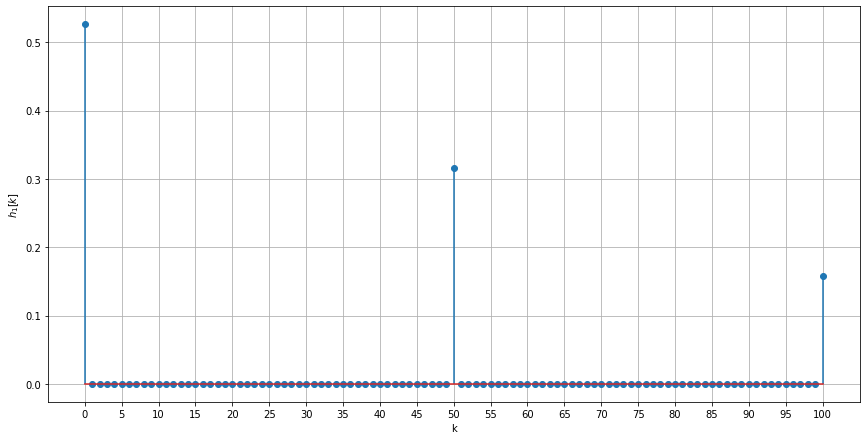

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

a = 1
b = 0.6
c = 0.3
M = 50
N = 220

h1 = [0] * (2 * M + 1)
h1[0] = a / (a + b + c)
h1[M] = b / (a + b + c)
h1[2 * M] = c / (a + b + c)
h1 = np.array (h1)
plt.figure (figsize=[32, 16])
plt.subplot (2, 2, 1)
plt.stem (h1, use_line_collection=True)
plt.grid ()
plt.xticks(np.arange (0, h1.size, 5))
plt.xlabel ("k")
plt.ylabel ("$h_1[k]$")

Text(0, 0.5, '$h_2[k]$')

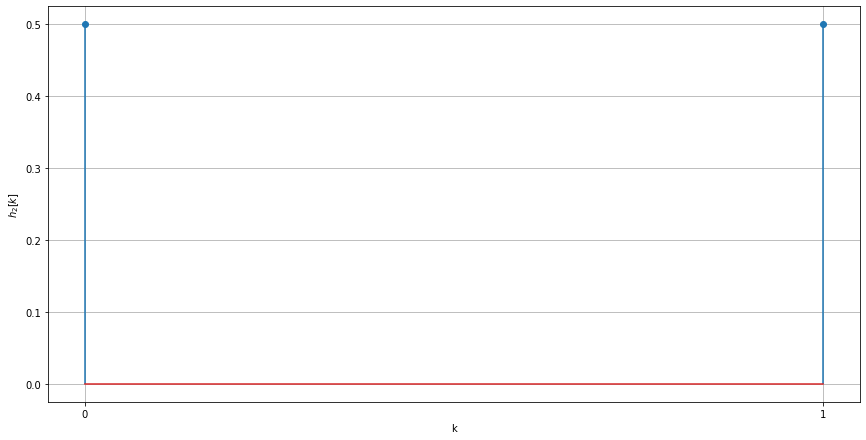

In [ ]:
h2 = np.array ([0.5, 0.5])
plt.figure (figsize=[32, 16])
plt.subplot (2, 2, 1)
plt.stem (h2, use_line_collection=True)
plt.grid ()
plt.xticks(np.arange (h2.size))
plt.xlabel ("k")
plt.ylabel ("$h_2[k]$")

Text(0, 0.5, '$x[k]$')

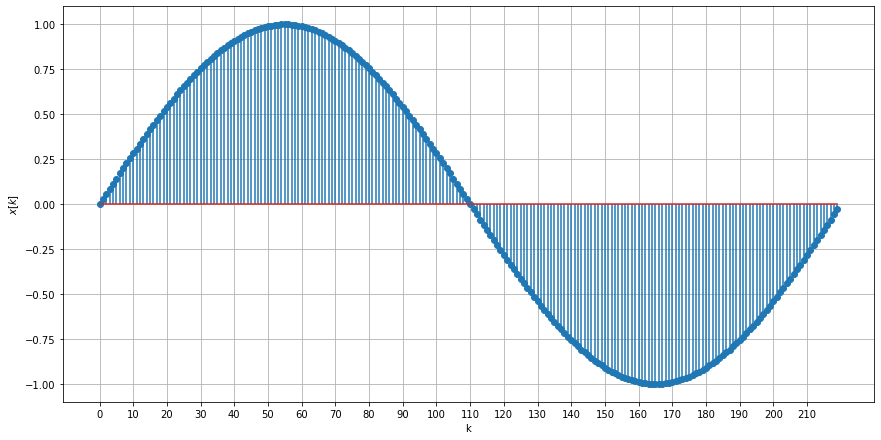

In [ ]:
x = np.array ([np.sin (2 * np.pi * k / N) for k in range (N)])
plt.figure (figsize=[32, 16])
plt.subplot (2, 2, 1)
plt.stem (x, use_line_collection=True)
plt.grid ()
plt.xticks(np.arange (0, x.size, 10))
plt.xlabel ("k")
plt.ylabel ("$x[k]$")

Text(0, 0.5, '$x_1[k]$')

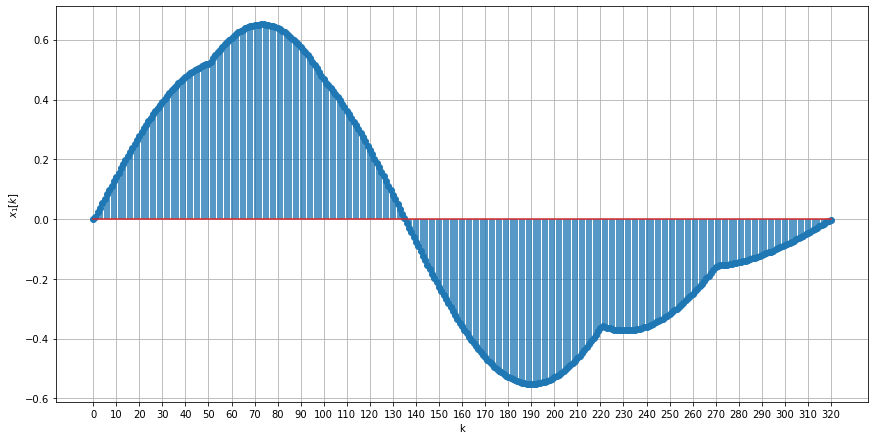

In [ ]:
x1 = signal.convolve (x, h1)
x1 = signal.convolve (x1, h2)
plt.figure (figsize=[32, 16])
plt.subplot (2, 2, 1)
plt.stem (x1, use_line_collection=True)
plt.grid ()
plt.xticks(np.arange (0, x1.size, 10))
plt.xlabel ("k")
plt.ylabel ("$x_1[k]$")

Text(0, 0.5, '$x_2[k]$')

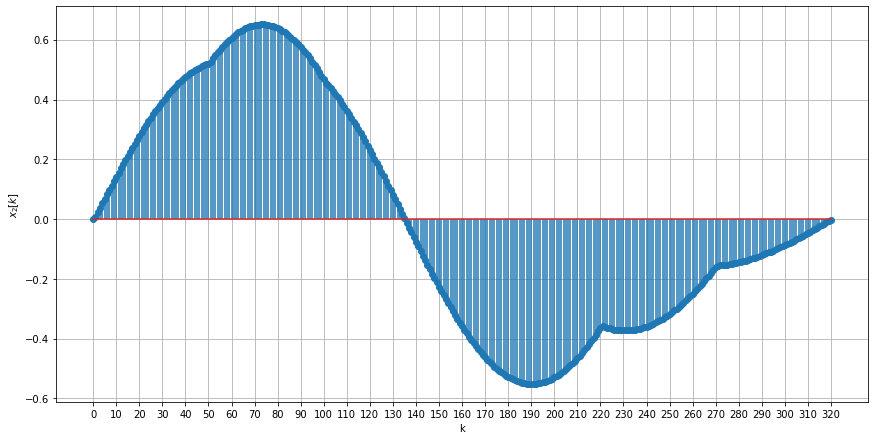

In [ ]:
x2 = signal.convolve (x, h2)
x2 = signal.convolve (x2, h1)
plt.figure (figsize=[32, 16])
plt.subplot (2, 2, 1)
plt.stem (x2, use_line_collection=True)
plt.grid ()
plt.xticks(np.arange (0, x2.size, 10))
plt.xlabel ("k")
plt.ylabel ("$x_2[k]$")

# Модуль 3. Аппроксимация идеальных частотно-избирательных фильтров и явление Гиббса

## Задача 3.1. Явление Гиббса для каузальной аппроксимации ИФНЧ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_c$  |0.1 |0.2 |0.3 |0.1 |0.2 |0.3 |
|    $N$    | 30 | 20 | 30 | 20 | 30 | 20 |

Рассмотрите фильтр с импульсной характеристикой
$$
h[k] =
\left\{\begin{array}{l}
\dfrac{\sin(2\pi\nu_c (k-N))}{\pi (k-N)}, 0\le k \le 2N-1
\\
0, \; \text{при других } k.
\end{array}\right.
$$
для случая $\nu_c,\; N$ из варианта. 

Вычислите с помощью моделирования и постройте график АЧХ этого фильтра.  
Как изменяется АЧХ с ростом $N$ при фиксированной частоте среза $\nu_c$?

Text(0, 0.5, '$h[k]$')

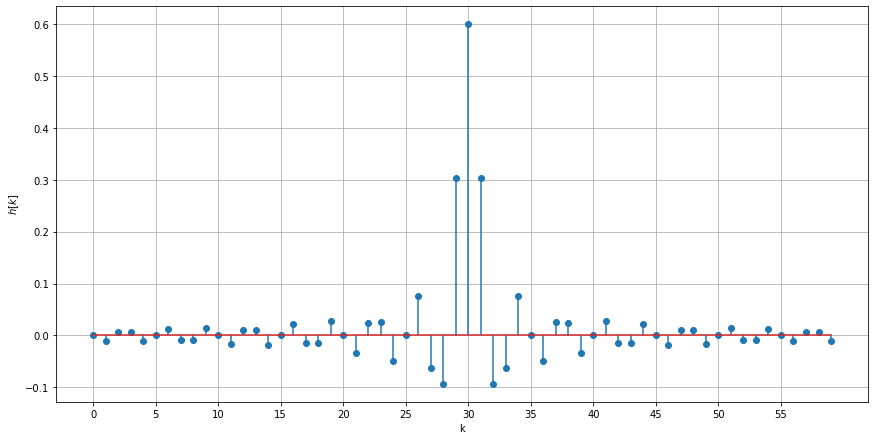

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

nu_c = 0.3
N = 30

h = np.array ([np.sin (2 * np.pi * nu_c * (k - N)) / (np.pi * (k - N)) if (k - N) != 0 else nu_c * 2 for k in range (2 * N)])
plt.figure (figsize=[32, 16])
plt.subplot (2, 2, 1)
plt.stem (h, use_line_collection=True)
plt.grid ()
plt.xticks(np.arange (0, h.size, 5))
plt.xlabel ("k")
plt.ylabel ("$h[k]$")

In [ ]:
def dtft(x, M=1024):
  return -0.5 + np.arange(M)/M, np.fft.fftshift(np.fft.fft(x, M))

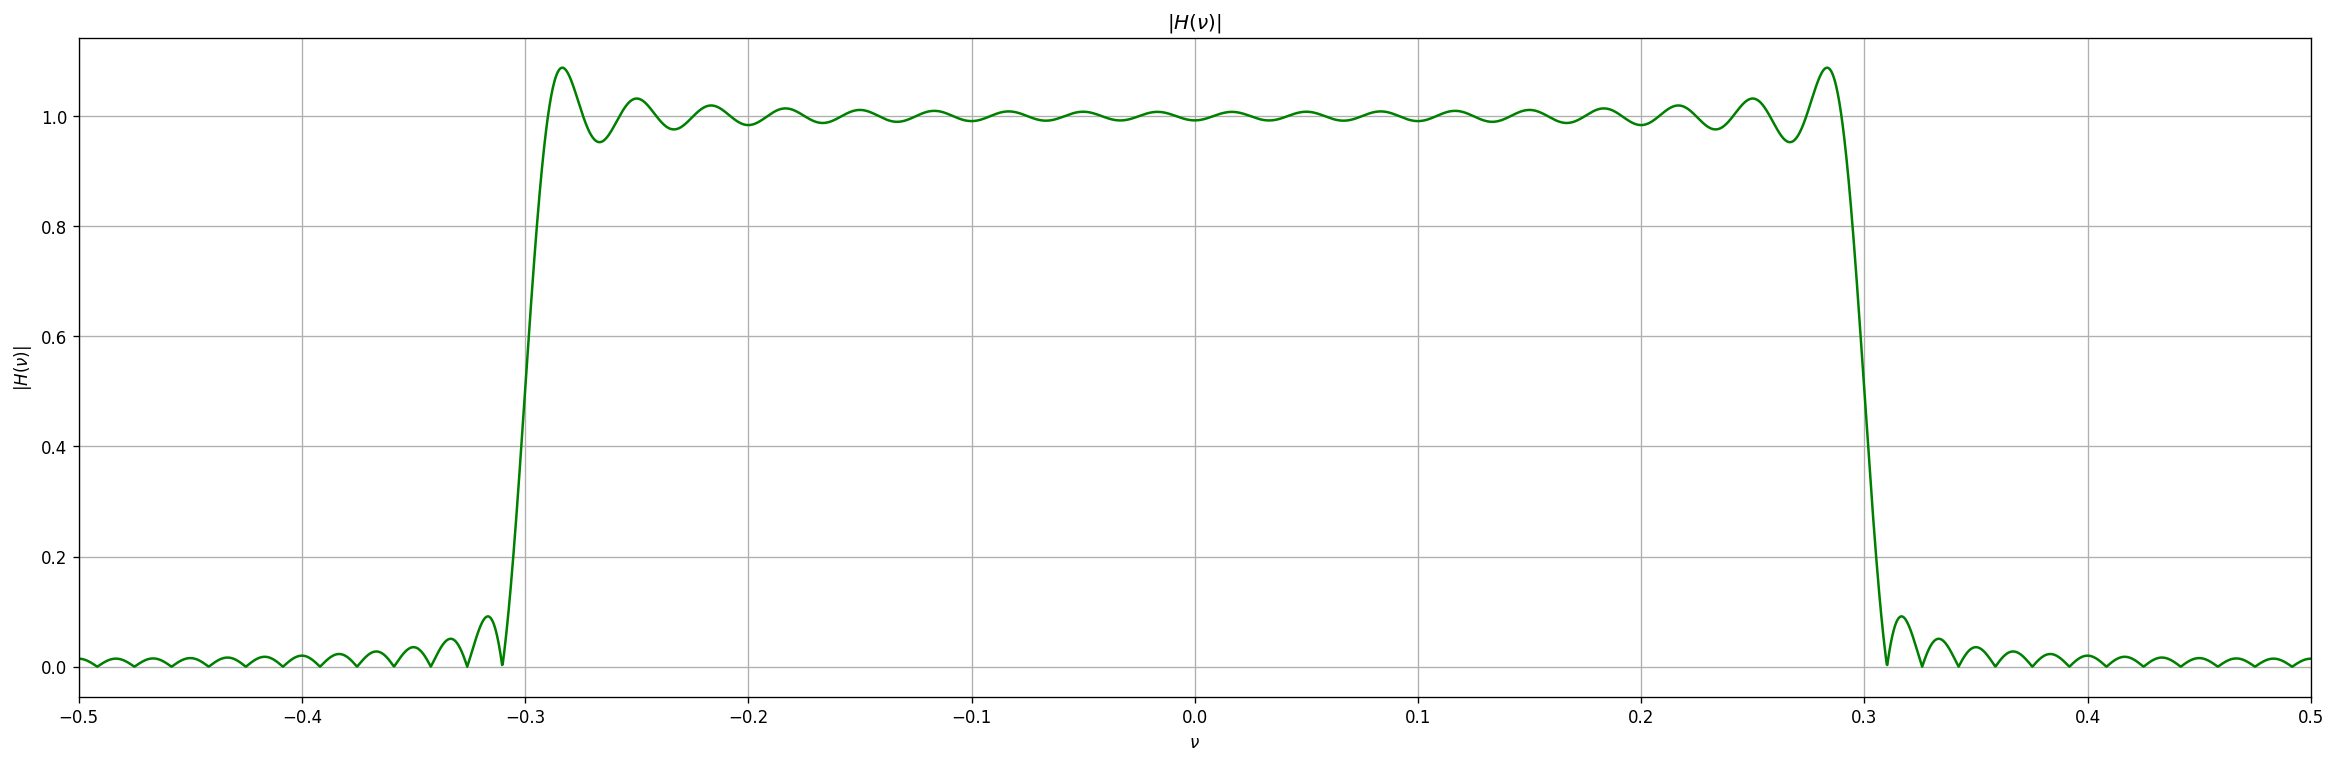

In [ ]:
nu, H = dtft (h, 4096)
plt.figure(figsize=[24, 16], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(H), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("$|H(\\nu)|$")
plt.grid()

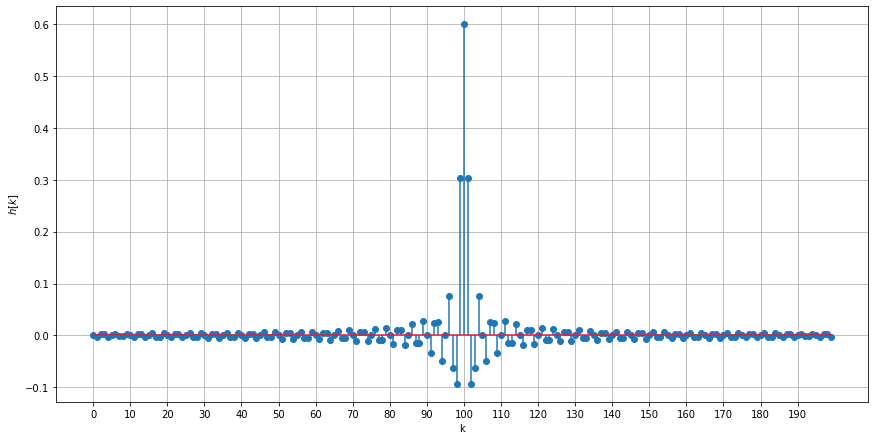

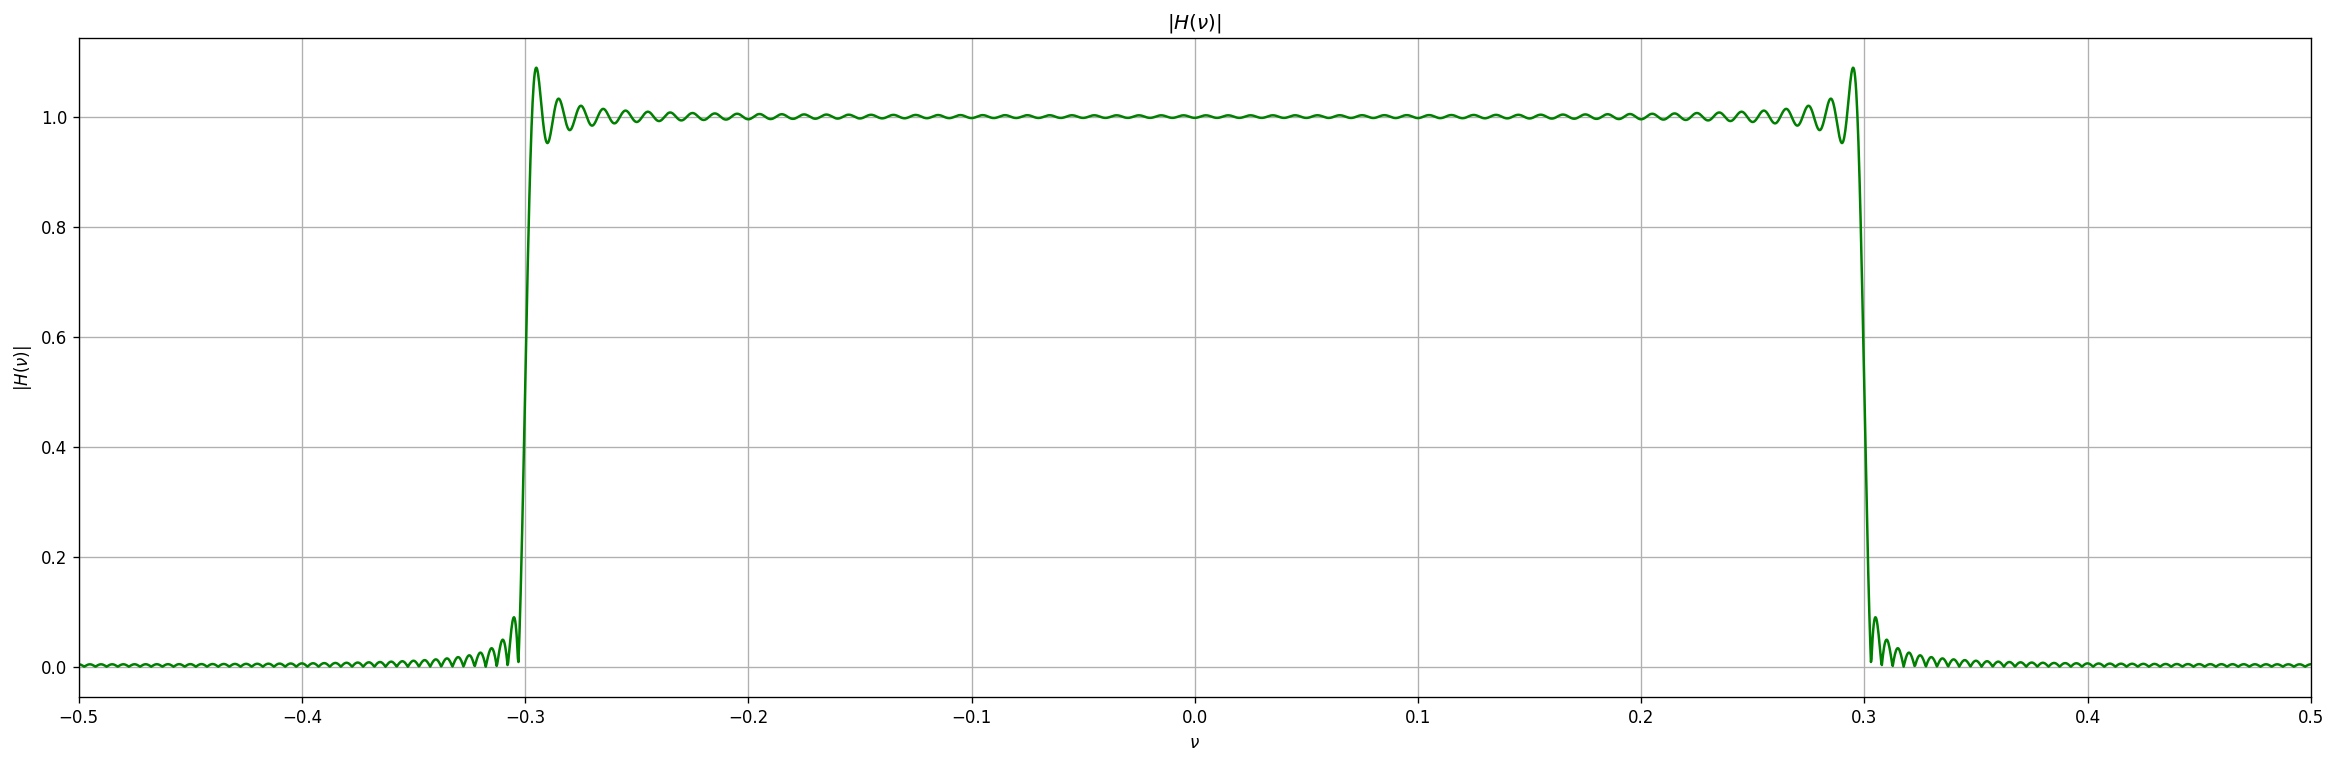

In [ ]:
N1 = 100
h = np.array ([np.sin (2 * np.pi * nu_c * (k - N1)) / (np.pi * (k - N1)) if (k - N1) != 0 else nu_c * 2 for k in range (2 * N1)])
plt.figure (figsize=[32, 16])
plt.subplot (2, 2, 1)
plt.stem (h, use_line_collection=True)
plt.grid ()
plt.xticks(np.arange (0, h.size, 10))
plt.xlabel ("k")
plt.ylabel ("$h[k]$")

nu, H = dtft (h, 4096)
plt.figure(figsize=[24, 16], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(H), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("$|H(\\nu)|$")
plt.grid()

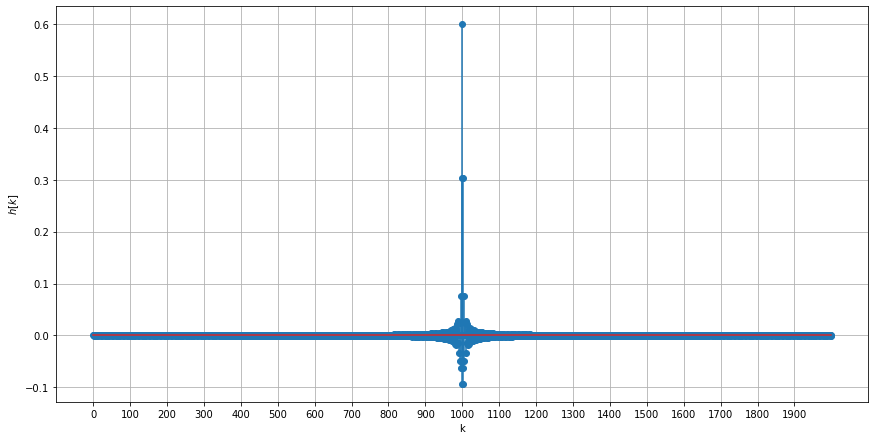

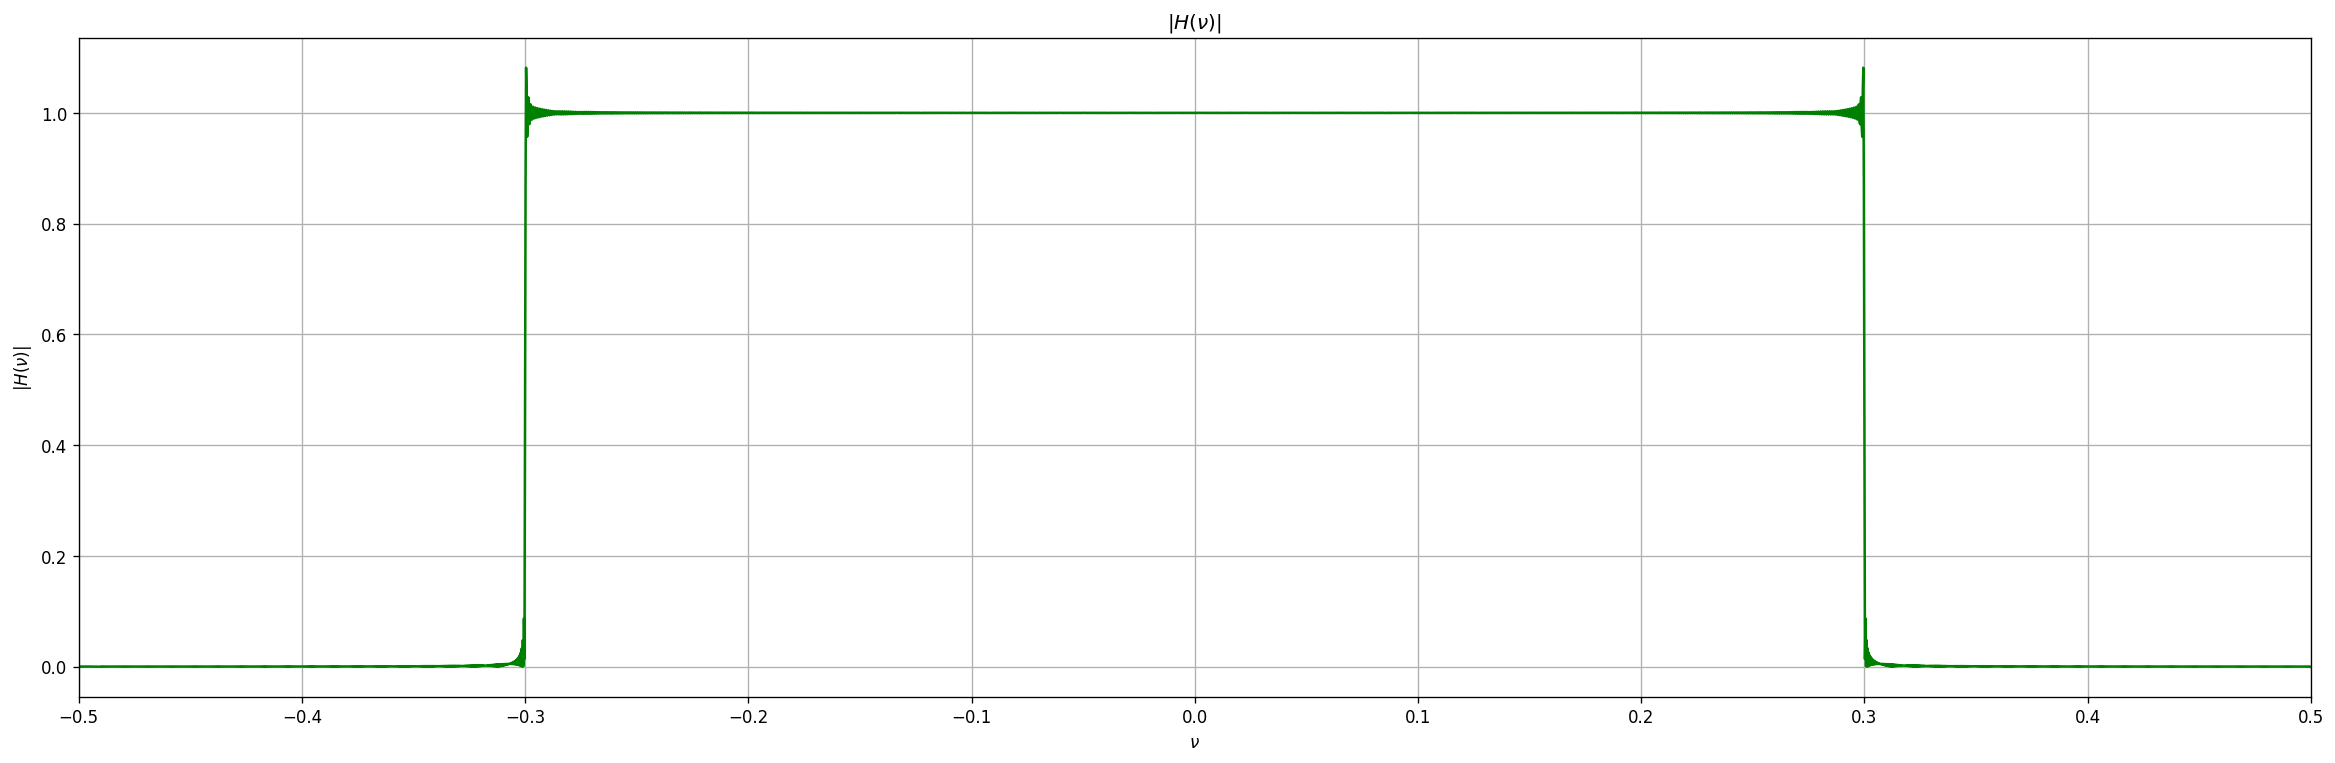

In [ ]:
N = 1000
h = np.array ([np.sin (2 * np.pi * nu_c * (k - N)) / (np.pi * (k - N)) if (k - N) != 0 else nu_c * 2 for k in range (2 * N)])
plt.figure (figsize=[32, 16])
plt.subplot (2, 2, 1)
plt.stem (h, use_line_collection=True)
plt.grid ()
plt.xticks(np.arange (0, h.size, 100))
plt.xlabel ("k")
plt.ylabel ("$h[k]$")

nu, H = dtft (h, 4096)
plt.figure(figsize=[24, 16], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(H), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("$|H(\\nu)|$")
plt.grid()

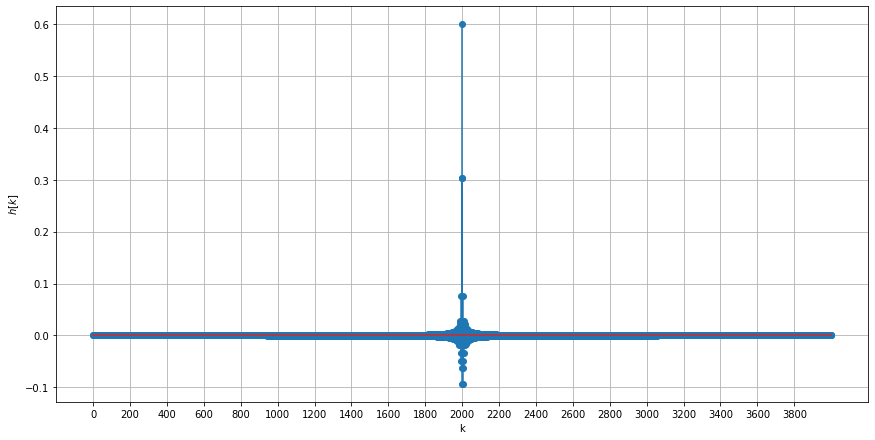

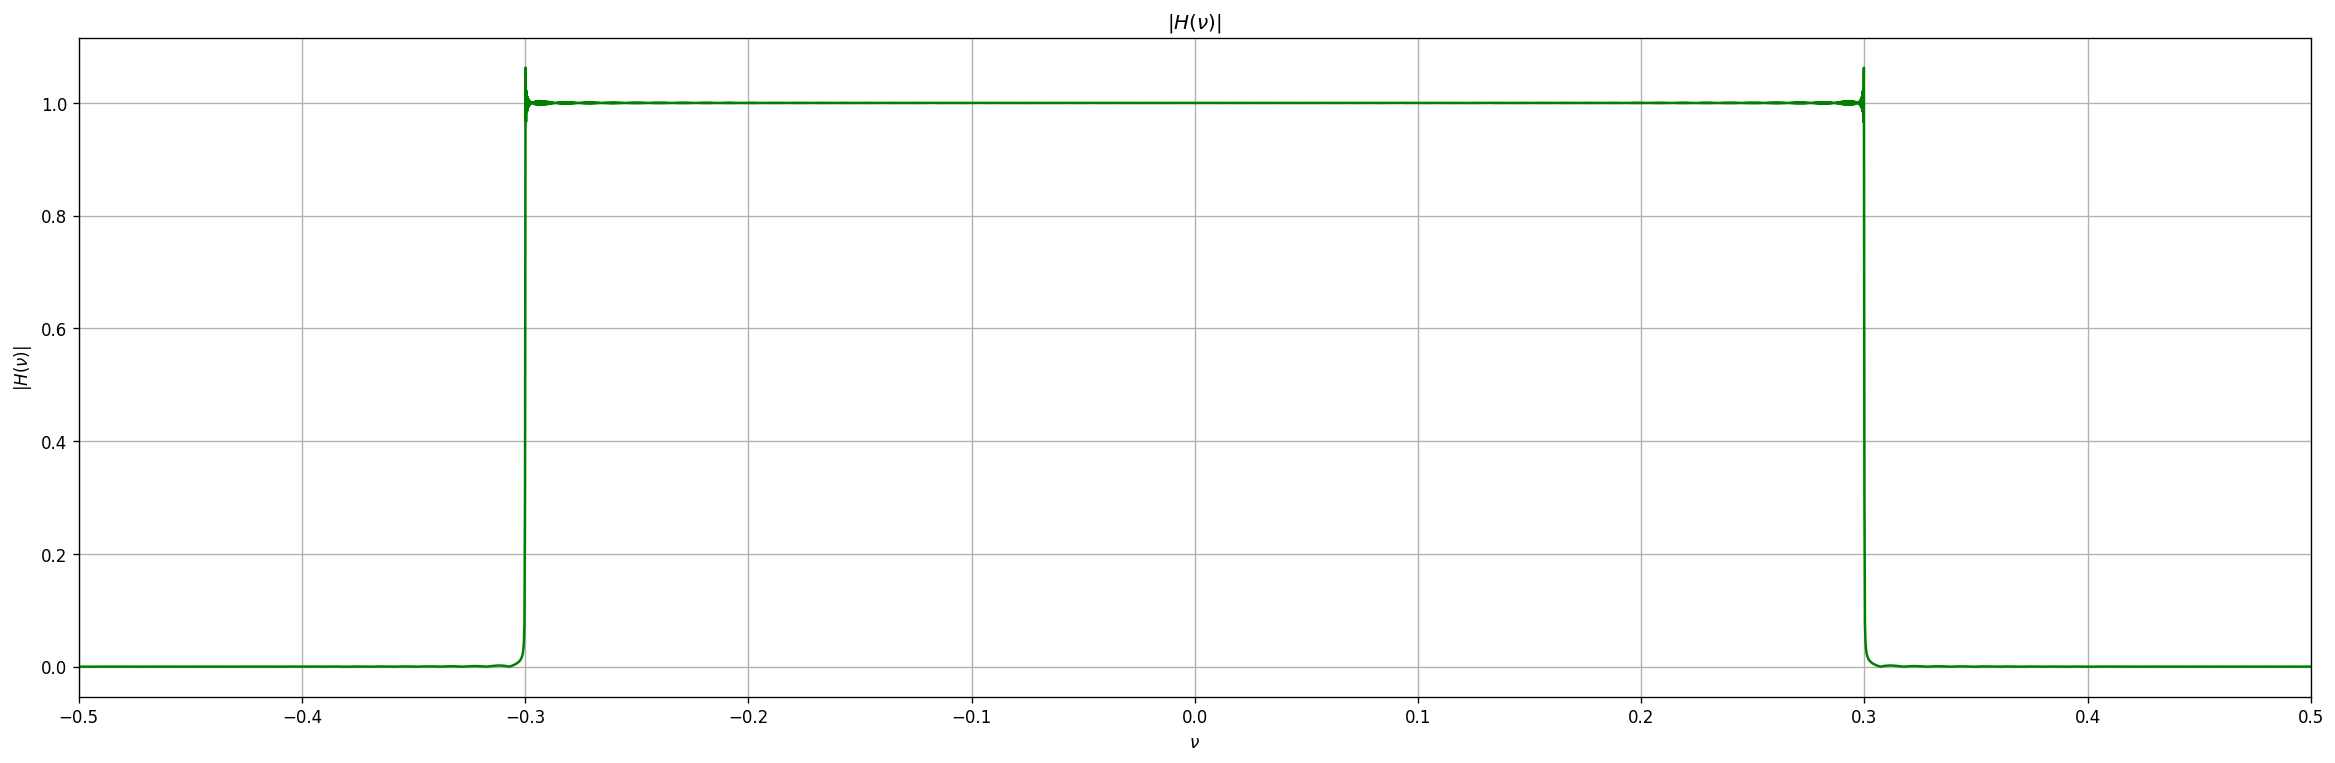

In [ ]:
N = 2000
h = np.array ([np.sin (2 * np.pi * nu_c * (k - N)) / (np.pi * (k - N)) if (k - N) != 0 else nu_c * 2 for k in range (2 * N)])
plt.figure (figsize=[32, 16])
plt.subplot (2, 2, 1)
plt.stem (h, use_line_collection=True)
plt.grid ()
plt.xticks(np.arange (0, h.size, 200))
plt.xlabel ("k")
plt.ylabel ("$h[k]$")

nu, H = dtft (h, 4096)
plt.figure(figsize=[24, 16], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(H), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("$|H(\\nu)|$")
plt.grid()

## Задача 3.2.  Аппроксимация фильтра с заданной частотной характеристикой с помощью ДВПФ   

Определить импульсную характеристику $h_{ideal}[k]$ фильтра, частотная характеристика которого является действительной функцией частоты и представлена на рисунке. 

Рассмотреть фильтр, импульсная характеристика которого в отличии от $h_{ideal}[k]$  усечена до $2N$ отсчетов и сдвинута на $N$ отсчетов вправо. С помощью моделирования определить и построить график АЧХ. Сравнить АЧХ обоих фильтров.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

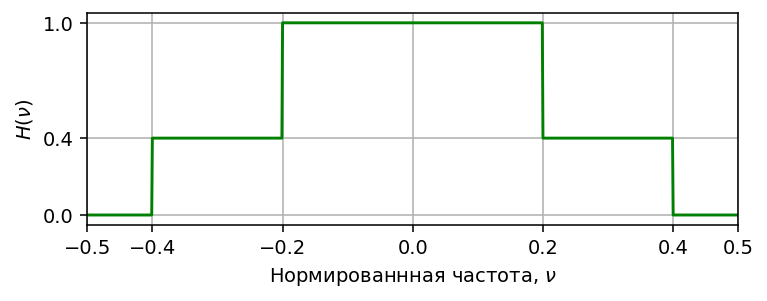

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

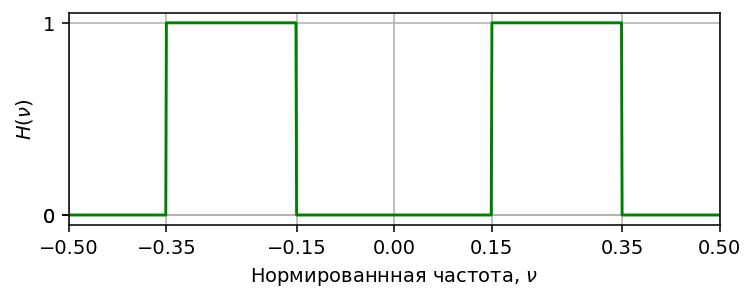

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

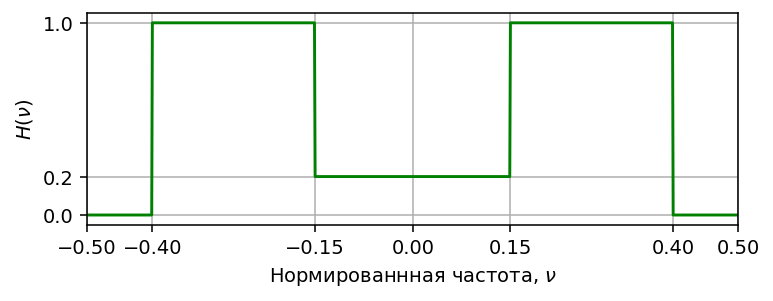

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

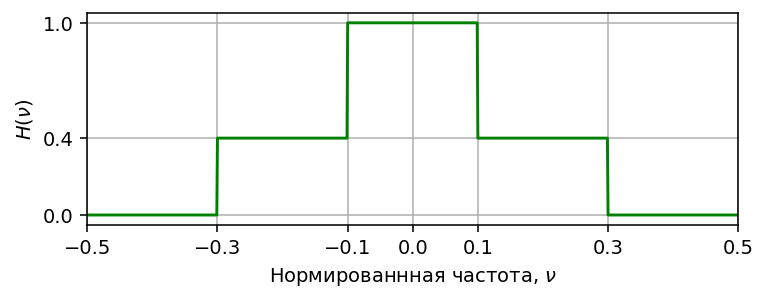

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

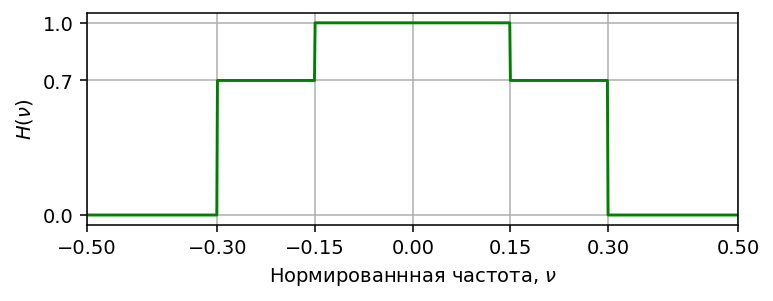

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

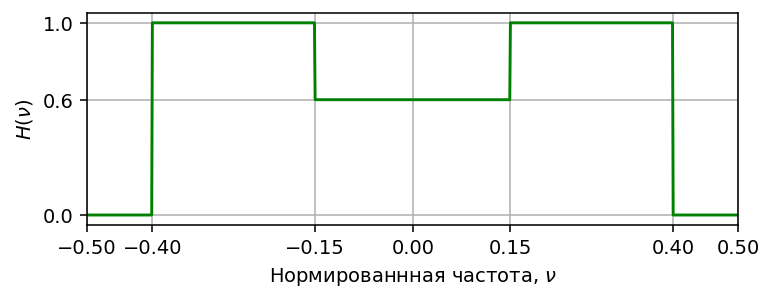

<IPython.core.display.Javascript object>

In [ ]:
#@title > Варианты частотной характеристики фильтра (выбрать свой)
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal
from matplotlib import pylab
from google.colab import widgets


v_n = ['Вариант 1','Вариант 2','Вариант 3','Вариант 4','Вариант 5','Вариант 6']
tb = widgets.TabBar([v_n[it] for it in range(N_.size)])

nu_0=0.2
nu_c1 = [0.2, 0.15, 0.15, 0.1, 0.15, 0.15]
amp1 = [1,  0, 0.2, 1, 1, 0.6]
nu_c2 = [0.4, 0.35, 0.4,  0.3,  0.3,  0.4]
amp2 = [0.4, 1, 1, 0.4, 0.7,  1]

def H_val(nu, n):
  if abs(nu)<=nu_c1[n]:
      return amp1[n]
  if abs(nu)<=nu_c2[n]:
      return amp2[n]
  return 0



for it in range(N_.size):
    with tb.output_to(it, select=(it==0)):
        nu=np.arange(-0.5, 0.5, 0.001)
        H0 = [H_val(x, it) for x in nu]
        plt.figure(figsize=[6, 2], dpi=140)
        plt.plot(nu, H0,'g-')
        plt.xticks([-0.5, -nu_c2[it], -nu_c1[it], 0, nu_c1[it], nu_c2[it], 0.5])

        plt.grid()
        plt.yticks([0, min(amp1[it],amp2[it]), 1])
        plt.xlim([-0.5, 0.5])


        plt.xlabel("Нормированнная частота, $\\nu$")
        plt.ylabel("$H(\\nu)$")
        # plt.tight_layout()
        plt.show()

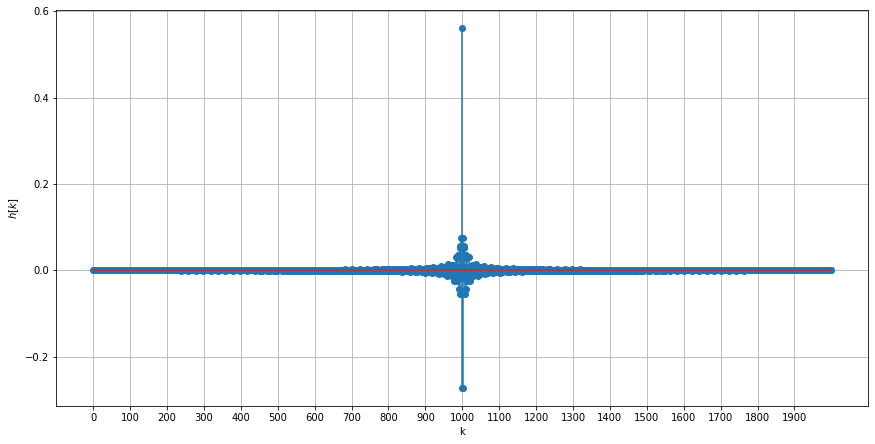

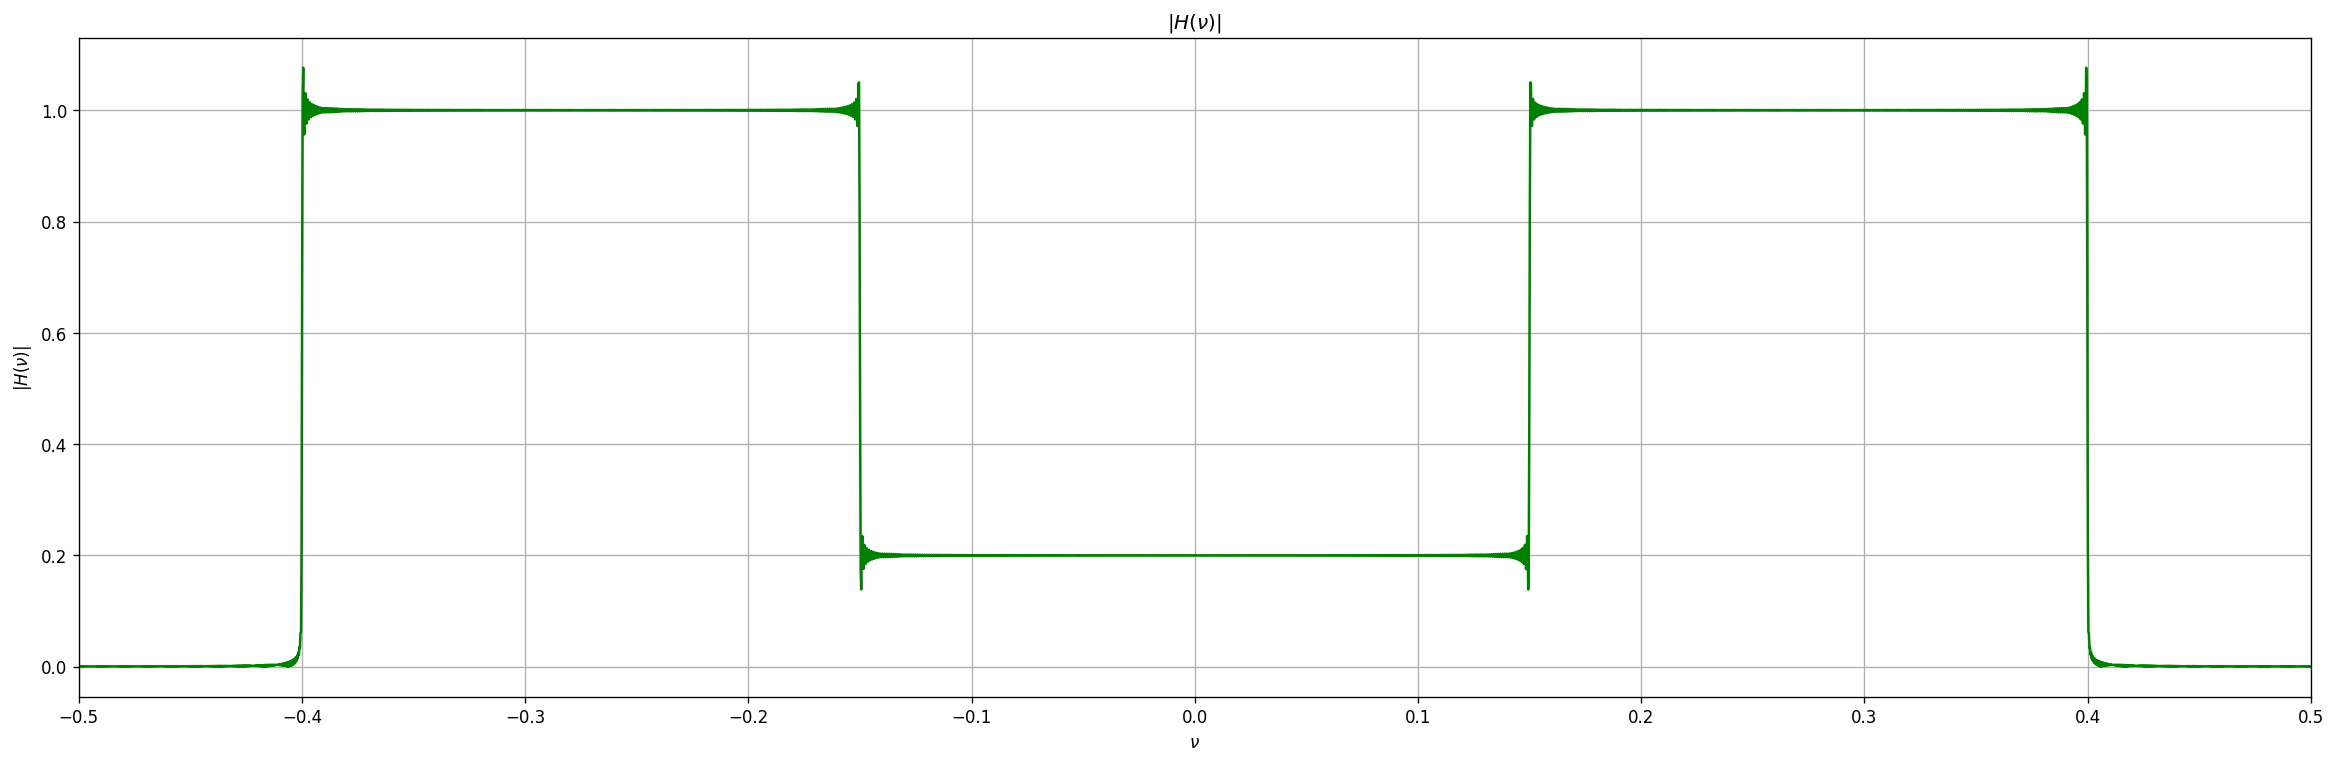

In [ ]:
N = 1000
nu1 = 0.15
nu2 = 0.4
H0 = 0.2

h = np.array ([(2 * np.sin (np.pi * (nu2 - nu1) * (k - N)) * np.cos (np.pi * (nu2 + nu1) * (k - N)) + H0 * np.sin (2 * np.pi * nu1 * (k - N))) \
               / (np.pi * (k - N)) if (k - N) != 0 else 2 * nu1 * (H0 - 1) + 2 * nu2 for k in range (2 * N)])
plt.figure (figsize=[32, 16])
plt.subplot (2, 2, 1)
plt.stem (h, use_line_collection=True)
plt.grid ()
plt.xticks(np.arange (0, h.size, 100))
plt.xlabel ("k")
plt.ylabel ("$h[k]$")

nu, H = dtft (h, 4096)
plt.figure(figsize=[24, 16], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(H), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("$|H(\\nu)|$")
plt.grid()